<a href="https://colab.research.google.com/github/JavierPachas/nn_examples/blob/main/dl_keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/JavierPachas/nn_examples/main/data/Advertising_2023.csv'

In [6]:
df = pd.read_csv(url, index_col = 0)

In [8]:
df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [10]:
df.shape

(1199, 5)

In [11]:
df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


In [24]:
X = df[['digital','TV','radio','newspaper']]

In [19]:
y = df['sales']

In [31]:
normalized_feature = keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
#Modeling
model = Sequential()
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1))

In [41]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [42]:
#fitting model
sq_model = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 32)

Epoch 1/32
30/30 [==============================] - 1s 10ms/step - loss: 1546.9926 - mse: 1546.9926 - val_loss: 1159.4662 - val_mse: 1159.4662
Epoch 2/32
30/30 [==============================] - 0s 4ms/step - loss: 1019.5184 - mse: 1019.5184 - val_loss: 835.8350 - val_mse: 835.8350
Epoch 3/32
30/30 [==============================] - 0s 3ms/step - loss: 764.2805 - mse: 764.2805 - val_loss: 641.8026 - val_mse: 641.8026
Epoch 4/32
30/30 [==============================] - 0s 4ms/step - loss: 599.3350 - mse: 599.3350 - val_loss: 510.2247 - val_mse: 510.2247
Epoch 5/32
30/30 [==============================] - 0s 4ms/step - loss: 481.2915 - mse: 481.2915 - val_loss: 413.4645 - val_mse: 413.4645
Epoch 6/32
30/30 [==============================] - 0s 3ms/step - loss: 390.8690 - mse: 390.8690 - val_loss: 337.4005 - val_mse: 337.4005
Epoch 7/32
30/30 [==============================] - 0s 4ms/step - loss: 323.3060 - mse: 323.3060 - val_loss: 288.0235 - val_mse: 288.0235
Epoch 8/32
30/30 [=========

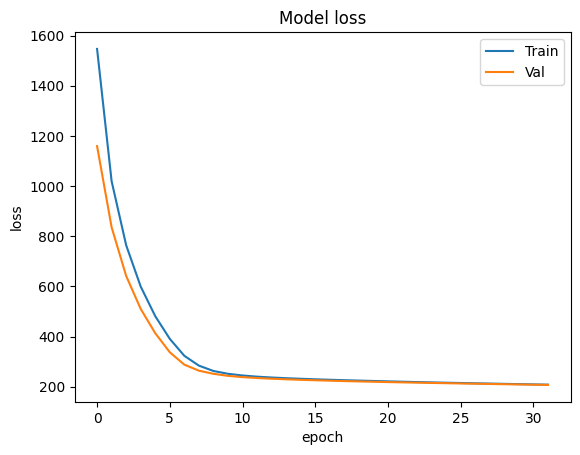

In [49]:
#evaluation
plt.plot(sq_model.history['loss'])
plt.plot(sq_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()